<a href="https://colab.research.google.com/github/maushamkumar/PyTorch/blob/main/01_Pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow.

In [1]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "Putting it all together"}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# check PyTorch version
torch.__version__

'2.2.1+cu121'

## Data (preparing and loading)

Data can be almost anything... in machine learning

* Excel speadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* Audio like songs or podcasts
* CSV
* DNA
* Text

Machine learning is a game of two parts
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *Known* data using the linear regression formula.


we'll use a linear regression formula to make a straight line with *Known*  **Parameters**

In [3]:
# create *known* parameters
weight = 0.7
bias = 0.3

In [4]:
# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # Uppercase represent a tensor lower case represents vector or matrix but for now this represent vector
y = weight * X + bias


In [5]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [6]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important steps in machine and Deep learning in general)

#### Let's create a training and test set with our data.

In [7]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [8]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize this data?

This is where the data explorer's motto comes in to play

"Visualize, visualize, visualize"

In [9]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # plot test data in green
  plt.scatter(test_data, test_labels, c="y", s=4, label="Test data")

  # Are there predictions?
  if predictions is not None:
    # plot the prediction if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

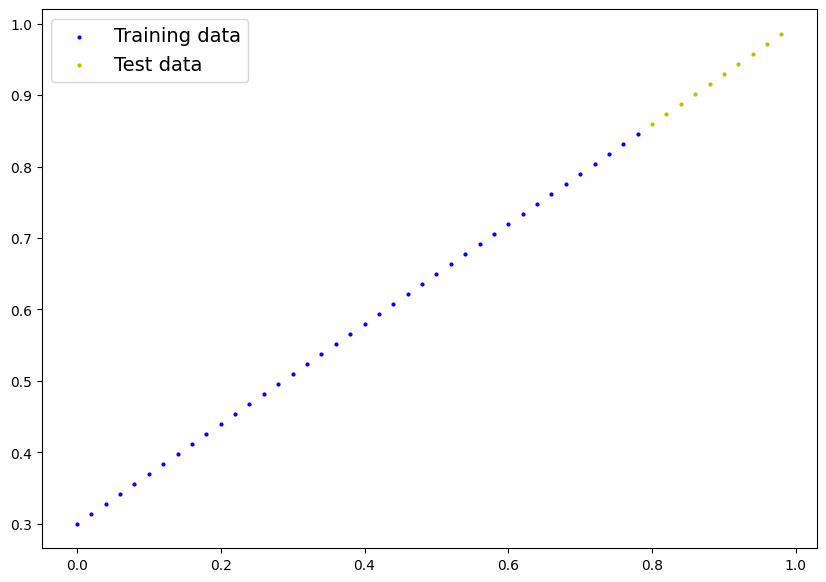

In [10]:
plot_predictions()

## Creating our first PyTorch model for linear regression

What our model does:
* Start with random values (weights & bias)
* Look at training data and adjust the random values to better represent (or get closer to ) the ideal values (the weight & bias values we used to create the data )

How does it do so?
1. Gradient descent
2. Backpropagation
3. Loss function
4. Accuracy

In [11]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think "model" in Keras)
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # <- start with a random weight and try to adjust it to the ideal weight
                                            requires_grad=True, # <- Can this parameter be updated via gradient descent?
                                            dtype=torch.float)) # <- PyTorch loves the datatype torch.float32

    self.bias = nn.Parameter(torch.randn(1,  # <- start with a random bias and try to adjust it to the ideal bias
                                         requires_grad=True, # <- Can this parameter be updated via gradient descent?
                                         dtype=torch.float)) # <- PyTorch loves the datatype torch.float32

    # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
      return self.weights * x + self.bias # This is the linear regression formula


### Breaking down what's happening in our PyTorch linear regression model

### PyTorch model building essentials

* **torch.nn** - contains all of the building blocks for computational graphs(another word for neural networks)

* **torch.nn.Parameter** - what parameters should our model try and learn, often a PyTorch layer from troch.nn will set these for use

* **torch.nn.module** - The base class for all neural network modules, if you subclass it, you should overwrite forward ()
* **torch.optim** - this where the optimizers in pytorch live, they will help with gradent descent
* def Forward() - All nn.module subclasses requires you to overwrite forward(), this method defines what happens in the forward computation of the neural network

### Checking out the internals of our PyTorch model

#### Checking the content of our PyTorch model

Now we've created a model, let's see what's inside.....

So, we can check out model parameters or what's inside our model using. Parameters()

In [12]:
# Create a random seed
torch.manual_seed(42)

In [13]:
# Create an instance of the model (this is a subclass of nn.Module)
model = LinearRegressionModel()

list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [14]:
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [15]:
model

LinearRegressionModel()

In [16]:
# Check our the parameters
model.parameters()

<generator object Module.parameters at 0x7e40aaf799a0>

In [17]:
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [18]:
torch.randn(1)

tensor([0.2345])

In [19]:
torch.randn(1)

tensor([0.2303])

In [20]:
torch.randn(3)

tensor([-1.1229, -0.1863,  2.2082])

In [21]:
torch.randn(3)

tensor([-0.6380,  0.4617,  0.2674])

In [22]:
# List named parameters
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [23]:
weight, bias

(0.7, 0.3)

### Making Predictions with our random model using torch.inference_mode()


To check our model's predictive power, let's see how well it predicts y_test based on x_test.

When we pass data through our model, it's going to run it through the forward() method

In [24]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [25]:
y_preds = model(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [26]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [27]:
# you can also do somothing with torch,no_grad(), however, torch.inference_mode () is preferred
with torch.no_grad():
  y_preds = model(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

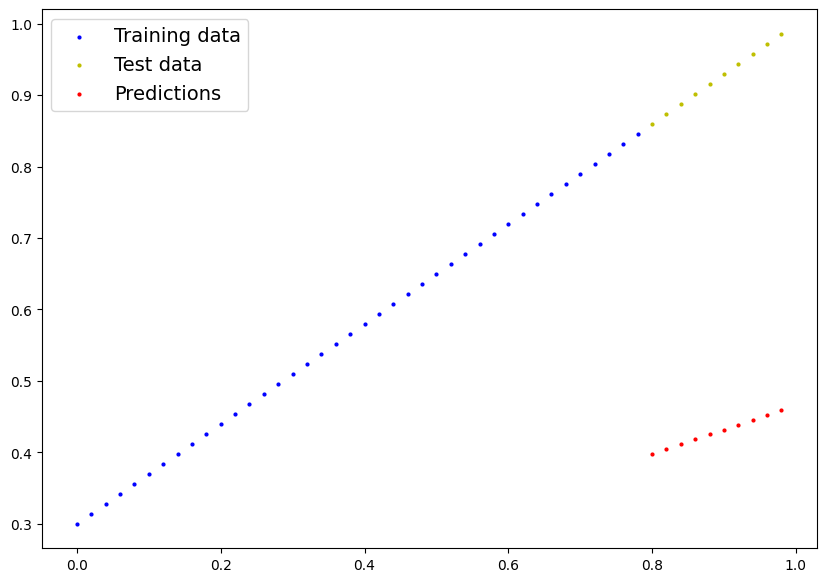

In [28]:
plot_predictions(predictions=y_preds)

inference mode Twitter


## Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters

or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your model predictions are is to use a loss function(another word cost function)

* Note: Loss function may also be called cost function or criterion in different area. For our case, we're going to refer to it as a loss function.

Things we need to train:
* **Loss Function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.

* **Optimizer:** Takes into account the loss function and adjusts the model's parameters (e.g. weights and biases) to improve the loss function.

And specifically for PyTorch , we need:
* A training loop
* A testing loop

In [29]:
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [30]:
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Setting up a loss function and optimizer with PyTorch

In [31]:
# Setup a loss function
loss_fn = nn.L1Loss()

# setup an optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [32]:
loss_fn

L1Loss()

*Q* which loss function and optimizer should i use?

*A:* This will be problem-specific, But with experience, you'll get an idea of what works and what doesn't with particular model.

For example, for a regression problem (like ours), a loss function of nn.L1Loss
and an optimizer like torch.optim.SGD() will suffice.

But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of nn.BECLoss (binary cross entropy).

### Building a training loop(and a testing loop) in PyTorch

A couple of things we need in a traning loop:

0. Loop through the data
1. Forward pass (this involves data moving through our model's forward() functions) to make prediction on data- also called Forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backward through  the network to calculate the gradient of each of the parameters of our model with respect to the loss(**backpropagation**)
5. optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [33]:
list(model.eval().parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [34]:
with torch.no_grad():
  list(model.parameters())

In [35]:
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [36]:
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a hyperparameter because we've set it ourselves)
epochs = 100

# Training
# 0. Loop through the data
for epoch in range(epochs):
  # set the model to training mode
  model.train() # train mode i PyTorch set all parameters the required gradient to require gradients

  # 1. Forward pass
  y_pred  = model(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train)
  print(f"Loss: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

  ### Testing
  model.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm)
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes
  # with torch.no_grad(): # you may also see torch.no_grad() in older PyTorch code
    # Forward pass in testing mode
    test_pred = model(X_test)

    # 2. Calculate the the loss
    test_loss = loss_fn(test_pred, y_test)

  # print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

  # Print out model state_dict()
  print(model.state_dict())

Loss: 0.31288138031959534
Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss: 0.3013603389263153
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
Loss: 0.28983935713768005
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
Loss: 0.2783183455467224
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
Loss: 0.26679736375808716
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
Loss: 0.2552763521671295
OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0.1888]))])
Loss: 0.24375534057617188
OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.1988]))])
Loss: 0.23223432898521423
OrderedDict([('weights', tensor([0.3679])), ('bias', tensor([0.2088]))])
Loss: 0.22071333229541779
OrderedDict([('weights', tensor([0.3718])), ('bias', tensor([0.2188]))])
Loss: 0.20919232070446014
OrderedDict([('w

In [37]:
model.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [38]:
weight, bias

(0.7, 0.3)

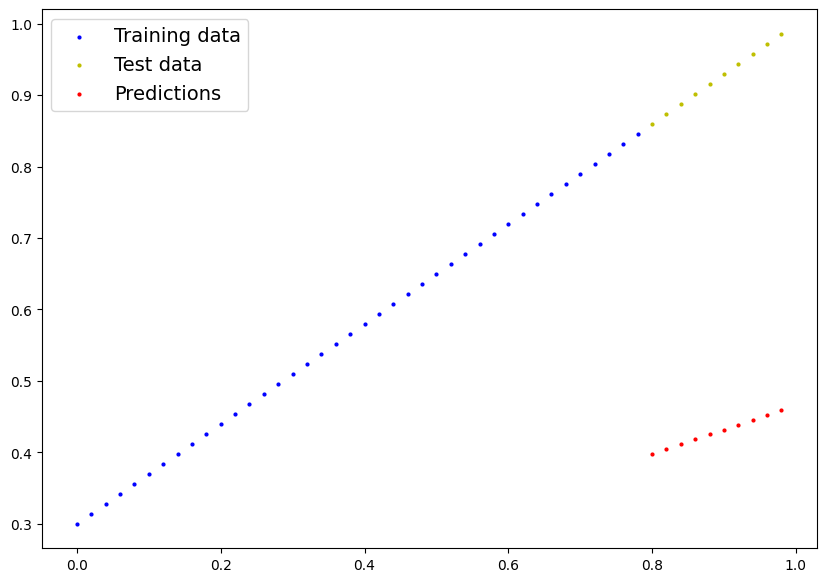

In [39]:
plot_predictions(predictions=y_preds)

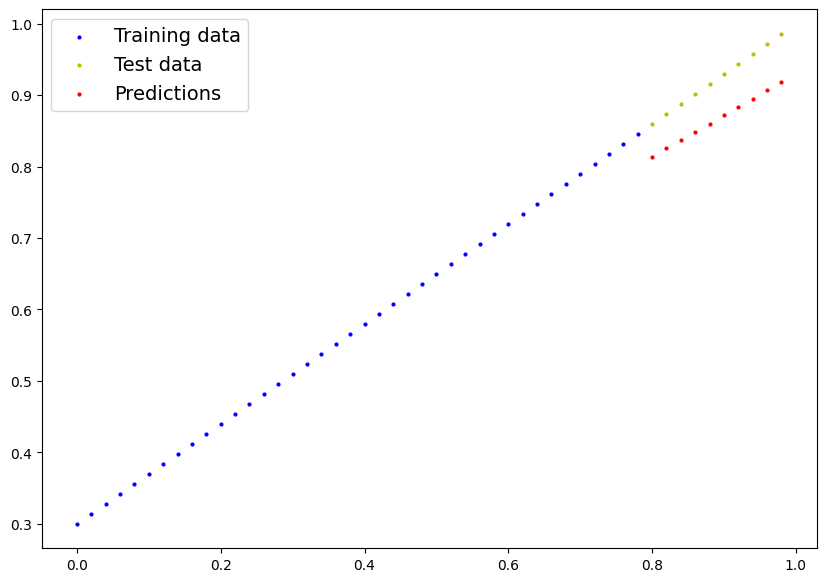

In [40]:
with torch.inference_mode():
  y_preds_new = model(X_test)

plot_predictions(predictions=y_preds_new)

In [41]:
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a hyperparameter because we've set it ourselves)
epochs = 100

# Create an empty list to track the loss values
epoch_count = []
loss_values = []
test_loss_values = []

# Training
# 0. Loop through the data
for epoch in range(epochs):
  # set the model to training mode
  model.train() # train mode i PyTorch set all parameters the required gradient to require gradients

  # 1. Forward pass
  y_pred  = model(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train)
  print(f"Loss: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

  ### Testing
  model.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm)
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes
  # with torch.no_grad(): # you may also see torch.no_grad() in older PyTorch code
    # Forward pass in testing mode
    test_pred = model(X_test)

    # 2. Calculate the the loss
    test_loss = loss_fn(test_pred, y_test)

  # print out what's happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

  # Print out model state_dict()
  print(model.state_dict())

Loss: 0.024458957836031914
Epoch: 0 | Loss: 0.024458957836031914 | Test loss: 0.05646304413676262
OrderedDict([('weights', tensor([0.5800])), ('bias', tensor([0.3503]))])
Loss: 0.024110013619065285
OrderedDict([('weights', tensor([0.5818])), ('bias', tensor([0.3498]))])
Loss: 0.02376994863152504
OrderedDict([('weights', tensor([0.5834])), ('bias', tensor([0.3488]))])
Loss: 0.02342480979859829
OrderedDict([('weights', tensor([0.5852])), ('bias', tensor([0.3483]))])
Loss: 0.023080935701727867
OrderedDict([('weights', tensor([0.5868])), ('bias', tensor([0.3473]))])
Loss: 0.022739607840776443
OrderedDict([('weights', tensor([0.5886])), ('bias', tensor([0.3468]))])
Loss: 0.022391926497220993
OrderedDict([('weights', tensor([0.5902])), ('bias', tensor([0.3458]))])
Loss: 0.022054409608244896
OrderedDict([('weights', tensor([0.5920])), ('bias', tensor([0.3453]))])
Loss: 0.02170540764927864
OrderedDict([('weights', tensor([0.5938])), ('bias', tensor([0.3448]))])
Loss: 0.021366719156503677
Order

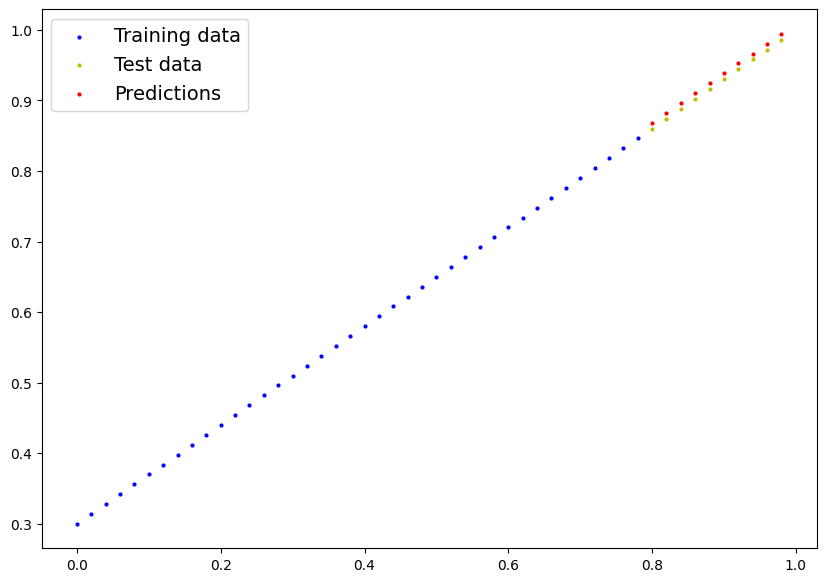

In [42]:
with torch.inference_mode():
  y_preds_new = model(X_test)

plot_predictions(predictions=y_preds_new)

In [43]:
epoch_count, loss_values, test_loss_values

([0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
 [tensor(0.0245, grad_fn=<MeanBackward0>),
  tensor(0.0210, grad_fn=<MeanBackward0>),
  tensor(0.0176, grad_fn=<MeanBackward0>),
  tensor(0.0142, grad_fn=<MeanBackward0>),
  tensor(0.0107, grad_fn=<MeanBackward0>),
  tensor(0.0073, grad_fn=<MeanBackward0>),
  tensor(0.0039, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>)],
 [tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

In [44]:
import numpy as np

In [45]:
np.array(torch.tensor(loss_values).numpy())

array([0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
       0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
      dtype=float32)

In [46]:
loss_value = np.array(torch.tensor(loss_values).numpy())

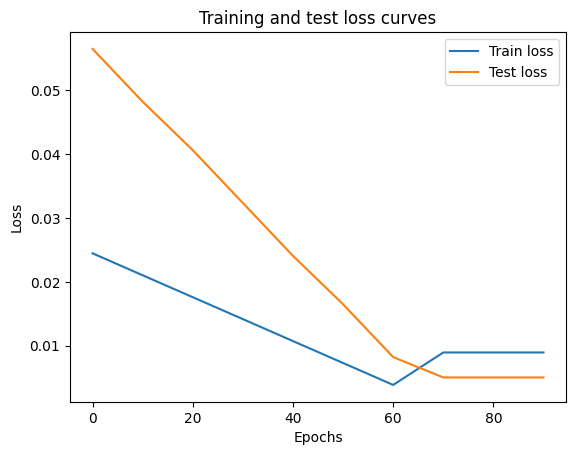

In [47]:
# Plot the loss curves

plt.plot(epoch_count, loss_value, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(

)

## Saving a model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch.
1. `torch.save(model, PATH)`-- Allows you to save a PyTorch object in Python's pickle format.

2. `torch.load(PATH)` -- Allows you to load a PyTorch object in Python's pickle format.

3. `torch.nn.module.load_state_dict()` - This allows to load a model's saved state dictionary

PyTorch's save & load code:- https://pytorch.org/tutorials/beginner/saving_loading_models.html

4. How to save google collab to google drive

In [48]:
model.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [50]:
# Saving our PyTorch model
from pathlib import Path

In [52]:
# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model.pth


In [54]:
!ls -1 models

01_pytorch_workflow_model.pth


## Loading a PyTorch Model

Since we saved our model's `state_dict` rather the entire model, we can load it we'll create a new instance of our model class and load the saved `state_dict`
into that


In [55]:
model.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [58]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model = LinearRegressionModel()

# Load the saved state_dict of model (this will update the new instance with updated parameters)
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [57]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [59]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [60]:
# Make some prediction with our loaded model
loaded_model.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [61]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [62]:
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through the steps above and see it all in one place

In [ ]:
# Import PyTorch and Matplotlib

# Import matplotlib

# check PyTorch version

Create device-agnostic code.
This means if we've got access to a GPU, our code will use it (for potentially faster computing).
If no GPU is available, the code will default to using CPU

In [63]:
# setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "CPU"

print (f"Using device: {device}")

Using device: CPU


#### 6.1 Data